In [5]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# مسار مجلد البيانات
data_dir = "data"

# إعداد التقسيم: تدريب / تحقق (validation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,        # 80% تدريب - 20% تحقق
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# بيانات التدريب
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# بيانات التحقق
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

print("الفئات:", train_generator.class_indices)

Found 1914 images belonging to 5 classes.
Found 476 images belonging to 5 classes.
الفئات: {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4}


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# نبني الموديل
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # عدد الفئات = 5
])

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ملخص الموديل
model.summary()

C:\Users\sameh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Found 2390 files belonging to 5 classes.
Using 1912 files for training.
Found 2390 files belonging to 5 classes.
Using 478 files for validation.
Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 44s 718ms/step - accuracy: 0.2454 - loss: 105.1137 - val_accuracy: 0.3159 - val_loss: 1.5557
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 38s 624ms/step - accuracy: 0.2985 - loss: 1.6409 - val_accuracy: 0.2782 - val_loss: 1.5943
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 38s 627ms/step - accuracy: 0.3278 - loss: 1.5300 - val_accuracy: 0.3033 - val_loss: 1.6310
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 36s 600ms/step - accuracy: 0.3641 - loss: 1.4342 - val_accuracy: 0.2762 - val_loss: 1.6718
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 622ms/step - accuracy: 0.3880 - loss: 1.4052 - val_accuracy: 0.2992 - val_loss: 1.6826
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 35s 588ms/step - accuracy: 0.4409 - loss: 1.2655 - val_accuracy: 0.3054 - val_loss: 1.9454
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 36s 596ms/step - accuracy: 0.5038 - loss:

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# إعداد الـ Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% تدريب و 20% اختبار
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# تحميل الصور
train_generator = train_datagen.flow_from_directory(
    'data',  # ← حط هنا مسار الصور
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    'data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

# بناء النموذج
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    GlobalAveragePooling2D(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# عرض النموذج
model.summary()

# تدريب النموذج
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Found 1914 images belonging to 5 classes.
Found 476 images belonging to 5 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,405 (431.27 KB)

 Trainable params: 110,405 (431.27 KB)

 Non-trainable params: 0 (0.00 B)

C:\Users\sameh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 42s 673ms/step - accuracy: 0.2328 - loss: 1.5977 - val_accuracy: 0.3235 - val_loss: 1.5270
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 40s 667ms/step - accuracy: 0.3782 - loss: 1.4464 - val_accuracy: 0.3298 - val_loss: 1.5344
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 40s 667ms/step - accuracy: 0.4171 - loss: 1.3735 - val_accuracy: 0.3908 - val_loss: 1.4408
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 40s 666ms/step - accuracy: 0.4469 - loss: 1.2925 - val_accuracy: 0.4202 - val_loss: 1.3957
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 671ms/step - accuracy: 0.5030 - loss: 1.2524 - val_accuracy: 0.4349 - val_loss: 1.3051
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 40s 663ms/step - accuracy: 0.5240 - loss: 1.1590 - val_accuracy: 0.4580 - val_loss: 1.2347
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 40s 666ms/step - accuracy: 0.5541 - loss: 1.1308 - val_accuracy: 0.4811 - val_loss: 1.2927
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 675ms/step - accuracy: 0.6000 - loss: 1.0664 - val_accu

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# حجم الصور
img_size = (224, 224)
batch_size = 32

# تحميل الصور مع التقسيم تلقائياً
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_data = datagen.flow_from_directory(
    'data',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    'data',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# بناء الموديل
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

# تجميع الموديل
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# التدريب
model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

# حفظ الموديل
model.save("waste_classifier_model.h5")

Found 1675 images belonging to 5 classes.
Found 715 images belonging to 5 classes.
Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 587ms/step - accuracy: 0.2438 - loss: 1.5939 - val_accuracy: 0.2909 - val_loss: 1.5373
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 619ms/step - accuracy: 0.3254 - loss: 1.4379 - val_accuracy: 0.3427 - val_loss: 1.4812
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 574ms/step - accuracy: 0.4081 - loss: 1.3580 - val_accuracy: 0.4154 - val_loss: 1.4324
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 572ms/step - accuracy: 0.4330 - loss: 1.3314 - val_accuracy: 0.4070 - val_loss: 1.4290
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 559ms/step - accuracy: 0.4515 - loss: 1.2697 - val_accuracy: 0.3622 - val_loss: 1.3702
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 565ms/step - accuracy: 0.4902 - loss: 1.1869 - val_accuracy: 0.4210 - val_loss: 1.3334
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 564ms/step - accuracy: 0.5463 - loss: 1.1605 - val_accuracy: 0.4420 - val_loss: 1.2774
Epoch 8/10
53/

In [19]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# إعداد البيانات مع Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data = datagen.flow_from_directory(
    'data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    'data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# تحميل MobileNetV2 بدون الطبقات العلوية
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # لتسريع التدريب والاعتماد على المميزات المدربة

# بناء الطبقات العليا
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# التجميع
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# التدريب
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

# حفظ النموذج
model.save("waste_classifier_model.keras")

Found 1675 images belonging to 5 classes.
Found 715 images belonging to 5 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step 
Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.2341 - loss: 2.0354 - val_accuracy: 0.3287 - val_loss: 1.5182
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 51s 974ms/step - accuracy: 0.3118 - loss: 1.7747 - val_accuracy: 0.4517 - val_loss: 1.3373
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 50s 952ms/step - accuracy: 0.3650 - loss: 1.5805 - val_accuracy: 0.5035 - val_loss: 1.2262
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 49s 921ms/step - accuracy: 0.4254 - loss: 1.4135 - val_accuracy: 0.5441 - val_loss: 1.1534
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 48s 915ms/step - accuracy: 0.4851 - loss: 1.2738 - val_accuracy: 0.5790 - val_loss: 1.0736
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 49s 917ms/step - accuracy: 0.4857 - loss: 1.2467 - val_accuracy: 0.6000 - val_loss: 1.0330
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 48s 913ms/step - accuracy: 0.5513 - loss: 1.1176 - val_acc

In [29]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# تحديد مسار البيانات
data_dir = 'data'  # مسار مجلد البيانات

# إعداد التحويلات للبيانات (Augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # تقسيم البيانات إلى تدريب واختبار بنسبة 20%
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # نفس تقسيم البيانات
)

# تقسيم البيانات باستخدام flow_from_directory
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # تصنيف متعدد الفئات
    shuffle=True,
    subset='training'  # البيانات الخاصة بالتدريب
)

val_data = val_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset='validation'  # البيانات الخاصة بالتحقق
)

# تحميل نموذج MobileNetV2 مع الأوزان مسبقة التدريب بدون الطبقة العليا
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# تجميد الطبقات الأساسية للنموذج
base_model.trainable = False

# إضافة الطبقات العلوية الخاصة بك
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(5, activation='softmax')(x)  # عدد الفئات = 5

# بناء النموذج النهائي
model = Model(inputs=base_model.input, outputs=x)

# تجميع النموذج
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# استخدام EarlyStopping للتوقف التلقائي عندما يتوقف التحسن
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# تدريب النموذج مع زيادة عدد الـ Epochs
history = model.fit(
    train_data,
    epochs=30,  # زيادة الـ Epochs
    validation_data=val_data,
    callbacks=[early_stopping]
)

# إذا أردت استخدام Fine-Tuning بعد تدريب النموذج لعدة epochs، يمكنك فك تجميد الطبقات العليا:
base_model.trainable = True

# تجميد الطبقات السفلى إذا أردت ذلك
for layer in base_model.layers[:100]:
    layer.trainable = False

# إعادة تجميع النموذج مع تغيير معدل التعلم
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# استئناف التدريب
history = model.fit(
    train_data,
    epochs=20,  # يمكن أن تزيده حسب الحاجة
    validation_data=val_data,
    callbacks=[early_stopping]
)

# حفظ النموذج النهائي
model.save('my_model.keras')  # بدلاً من HDF5

Found 1914 images belonging to 5 classes.
Found 476 images belonging to 5 classes.
Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 52s 806ms/step - accuracy: 0.4894 - loss: 1.2116 - val_accuracy: 0.7164 - val_loss: 0.7236
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 49s 814ms/step - accuracy: 0.8071 - loss: 0.5341 - val_accuracy: 0.7752 - val_loss: 0.5944
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 55s 922ms/step - accuracy: 0.8470 - loss: 0.4372 - val_accuracy: 0.7983 - val_loss: 0.5656
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 49s 811ms/step - accuracy: 0.8626 - loss: 0.3725 - val_accuracy: 0.7941 - val_loss: 0.5074
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 49s 809ms/step - accuracy: 0.8894 - loss: 0.3310 - val_accuracy: 0.8046 - val_loss: 0.4930
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 47s 789ms/step - accuracy: 0.9013 - loss: 0.2983 - val_accuracy: 0.8004 - val_loss: 0.5337
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 48s 792ms/step - accuracy: 0.9159 - loss: 0.2605 - val_accuracy: 0.8046 - val_loss: 0.5405
Epoch 8/30
60/

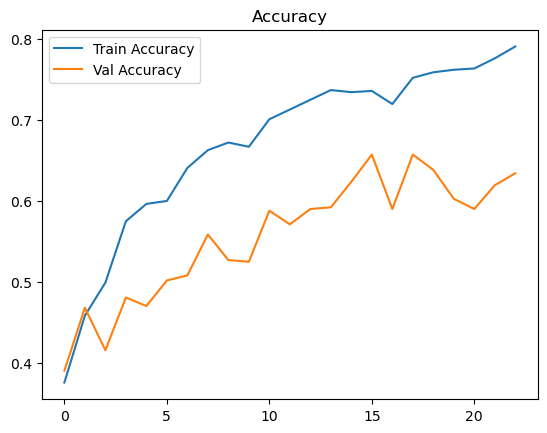

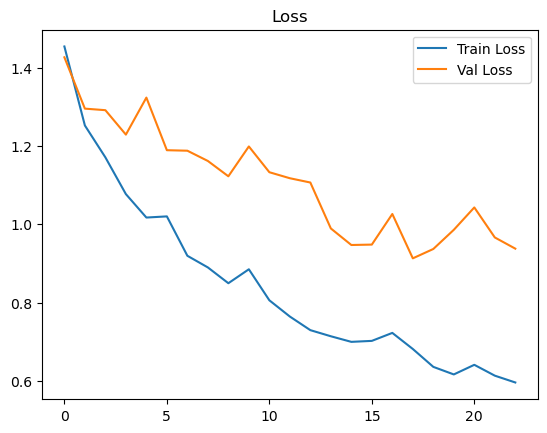

In [33]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [35]:
model.save('waste_classifier_model.keras')  # تنسيق حديث

Found 1914 images belonging to 5 classes.
Found 476 images belonging to 5 classes.
Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 60s 934ms/step - accuracy: 0.3005 - loss: 1.6700 - val_accuracy: 0.5882 - val_loss: 1.1145
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 54s 895ms/step - accuracy: 0.6081 - loss: 0.9939 - val_accuracy: 0.6282 - val_loss: 0.9489
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 54s 893ms/step - accuracy: 0.7060 - loss: 0.7736 - val_accuracy: 0.6513 - val_loss: 0.8099
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 54s 897ms/step - accuracy: 0.7159 - loss: 0.7270 - val_accuracy: 0.6807 - val_loss: 0.7903
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 54s 907ms/step - accuracy: 0.7429 - loss: 0.6535 - val_accuracy: 0.7311 - val_loss: 0.7430
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 54s 893ms/step - accuracy: 0.7787 - loss: 0.6165 - val_accuracy: 0.6954 - val_loss: 0.7359
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 54s 894ms/step - accuracy: 0.7843 - loss: 0.5748 - val_accuracy: 0.7353 - val_loss: 0.6981
Epoch 8/50
60/

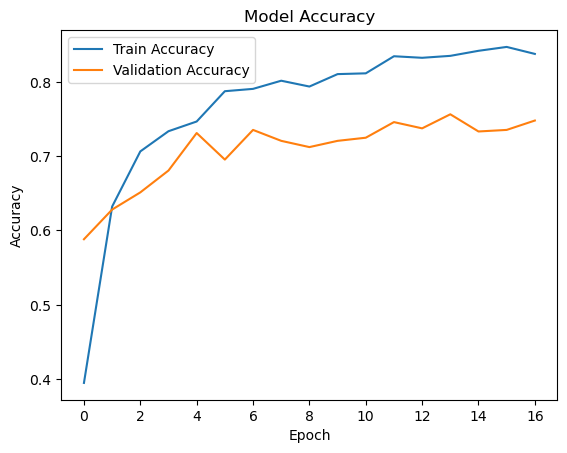

In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# 1. إعداد المسارات
data_path = 'data'

# 2. ImageDataGenerator مع split بين training و validation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    shear_range=0.2,
    brightness_range=(0.8, 1.2),
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% validation
)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# 3. تحميل MobileNetV2 بدون الرأس
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # نثبت الطبقات الأساسية

# 4. إضافة الطبقات الخاصة بنا
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# 5. Compile
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Callbacks
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("best_model.keras", save_best_only=True)
]

# 7. Training
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=callbacks
)

# 8. رسم accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# إعدادات عامة
img_size = (224, 224)
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE
data_dir = "data"

# تحميل وتقسيم البيانات
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

# عدد التصنيفات
num_classes = len(train_ds.class_names)

# تحسين الأداء
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

# تحميل EfficientNetB0
base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False

# بناء النموذج
inputs = layers.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.efficientnet.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)  # ← تم التعديل هنا

model = models.Model(inputs, outputs)

# تجميع النموذج
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
checkpoint_cb = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
earlystop_cb = EarlyStopping(patience=5, restore_best_weights=True, monitor='val_accuracy', mode='max')

# التدريب الأساسي
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=[checkpoint_cb, earlystop_cb]
)

# Fine-tuning
base_model.trainable = True
fine_tune_at = len(base_model.layers) // 2
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[checkpoint_cb, earlystop_cb]
)

Found 2390 files belonging to 5 classes.
Using 1912 files for training.
Found 2390 files belonging to 5 classes.
Using 478 files for validation.
Epoch 1/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 681ms/step - accuracy: 0.2080 - loss: 1.7191 

60/60 ━━━━━━━━━━━━━━━━━━━━ 61s 883ms/step - accuracy: 0.2086 - loss: 1.7180 - val_accuracy: 0.4372 - val_loss: 1.4291
Epoch 2/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 685ms/step - accuracy: 0.3983 - loss: 1.4474 

60/60 ━━━━━━━━━━━━━━━━━━━━ 52s 868ms/step - accuracy: 0.3989 - loss: 1.4464 - val_accuracy: 0.6109 - val_loss: 1.1943
Epoch 3/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.5108 - loss: 1.2575 

60/60 ━━━━━━━━━━━━━━━━━━━━ 50s 841ms/step - accuracy: 0.5114 - loss: 1.2566 - val_accuracy: 0.7071 - val_loss: 1.0282
Epoch 4/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.6195 - loss: 1.0857 

60/60 ━━━━━━━━━━━━━━━━━━━━ 50s 830ms/step - accuracy: 0.6197 - loss: 1.0852 - val_accuracy: 0.7385 - val_loss: 0.9092
Epoch 5/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 691ms/step - accuracy: 0.6733 - loss: 0.9687 

60/60 ━━━━━━━━━━━━━━━━━━━━ 52s 860ms/step - accuracy: 0.6734 - loss: 0.9681 - val_accuracy: 0.7762 - val_loss: 0.8190
Epoch 6/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 705ms/step - accuracy: 0.6821 - loss: 0.9036 

60/60 ━━━━━━━━━━━━━━━━━━━━ 53s 884ms/step - accuracy: 0.6825 - loss: 0.9031 - val_accuracy: 0.7908 - val_loss: 0.7495
Epoch 7/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - accuracy: 0.7361 - loss: 0.8250 

60/60 ━━━━━━━━━━━━━━━━━━━━ 48s 795ms/step - accuracy: 0.7361 - loss: 0.8246 - val_accuracy: 0.8075 - val_loss: 0.6937
Epoch 8/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 642ms/step - accuracy: 0.7644 - loss: 0.7544 

60/60 ━━━━━━━━━━━━━━━━━━━━ 48s 799ms/step - accuracy: 0.7644 - loss: 0.7544 - val_accuracy: 0.8159 - val_loss: 0.6485
Epoch 9/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 616ms/step - accuracy: 0.7824 - loss: 0.6987 

60/60 ━━━━━━━━━━━━━━━━━━━━ 46s 765ms/step - accuracy: 0.7824 - loss: 0.6987 - val_accuracy: 0.8347 - val_loss: 0.6123
Epoch 10/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 47s 781ms/step - accuracy: 0.7930 - loss: 0.6772 - val_accuracy: 0.8326 - val_loss: 0.5817
Epoch 11/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 46s 770ms/step - accuracy: 0.7871 - loss: 0.6640 - val_accuracy: 0.8347 - val_loss: 0.5561
Epoch 12/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.8020 - loss: 0.6219 

60/60 ━━━━━━━━━━━━━━━━━━━━ 46s 772ms/step - accuracy: 0.8019 - loss: 0.6218 - val_accuracy: 0.8452 - val_loss: 0.5334
Epoch 13/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 616ms/step - accuracy: 0.8168 - loss: 0.5966 

60/60 ━━━━━━━━━━━━━━━━━━━━ 46s 765ms/step - accuracy: 0.8167 - loss: 0.5966 - val_accuracy: 0.8515 - val_loss: 0.5140
Epoch 14/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 682ms/step - accuracy: 0.8322 - loss: 0.5684 

60/60 ━━━━━━━━━━━━━━━━━━━━ 50s 838ms/step - accuracy: 0.8322 - loss: 0.5682 - val_accuracy: 0.8536 - val_loss: 0.4972
Epoch 15/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.8316 - loss: 0.5616 

60/60 ━━━━━━━━━━━━━━━━━━━━ 49s 825ms/step - accuracy: 0.8314 - loss: 0.5616 - val_accuracy: 0.8577 - val_loss: 0.4823
Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.6479 - loss: 1.0050 - val_accuracy: 0.8556 - val_loss: 0.4963
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7146 - loss: 0.8817  

60/60 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.7148 - loss: 0.8812 - val_accuracy: 0.8598 - val_loss: 0.5105
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7526 - loss: 0.7910  

60/60 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.7526 - loss: 0.7906 - val_accuracy: 0.8661 - val_loss: 0.5121
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7748 - loss: 0.7202  

60/60 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.7749 - loss: 0.7199 - val_accuracy: 0.8703 - val_loss: 0.5006
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.7873 - loss: 0.6728 - val_accuracy: 0.8682 - val_loss: 0.4826
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8201 - loss: 0.6172  

60/60 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.8201 - loss: 0.6169 - val_accuracy: 0.8724 - val_loss: 0.4600
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8292 - loss: 0.5634  

60/60 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.8292 - loss: 0.5633 - val_accuracy: 0.8787 - val_loss: 0.4387
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8699 - loss: 0.5126  

60/60 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.8698 - loss: 0.5125 - val_accuracy: 0.8849 - val_loss: 0.4174
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8443 - loss: 0.4991 - val_accuracy: 0.8828 - val_loss: 0.3966
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.8474 - loss: 0.4787 - val_accuracy: 0.8849 - val_loss: 0.3782


In [5]:
# 1. فك التجميد عن الطبقات الأساسية في الموديل
base_model.trainable = True

# 2. إعادة الكومبايل بـ Learning Rate أقل
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3. التدريب الإضافي (fine-tuning)
fine_tune_epochs = 5
total_epochs = 15 + fine_tune_epochs  # عشان نرسم كل المراحل لاحقًا

history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=total_epochs,
    initial_epoch=15,
    callbacks=[checkpoint_cb, earlystop_cb]
)

Epoch 16/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8560 - loss: 0.4934 - val_accuracy: 0.8828 - val_loss: 0.3949
Epoch 17/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.8567 - loss: 0.4709 - val_accuracy: 0.8828 - val_loss: 0.3744
Epoch 18/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8641 - loss: 0.4441  

60/60 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.8642 - loss: 0.4440 - val_accuracy: 0.8891 - val_loss: 0.3570
Epoch 19/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9064 - loss: 0.3756  

60/60 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9061 - loss: 0.3759 - val_accuracy: 0.8912 - val_loss: 0.3416
Epoch 20/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8877 - loss: 0.3768  

60/60 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8878 - loss: 0.3767 - val_accuracy: 0.8975 - val_loss: 0.3290


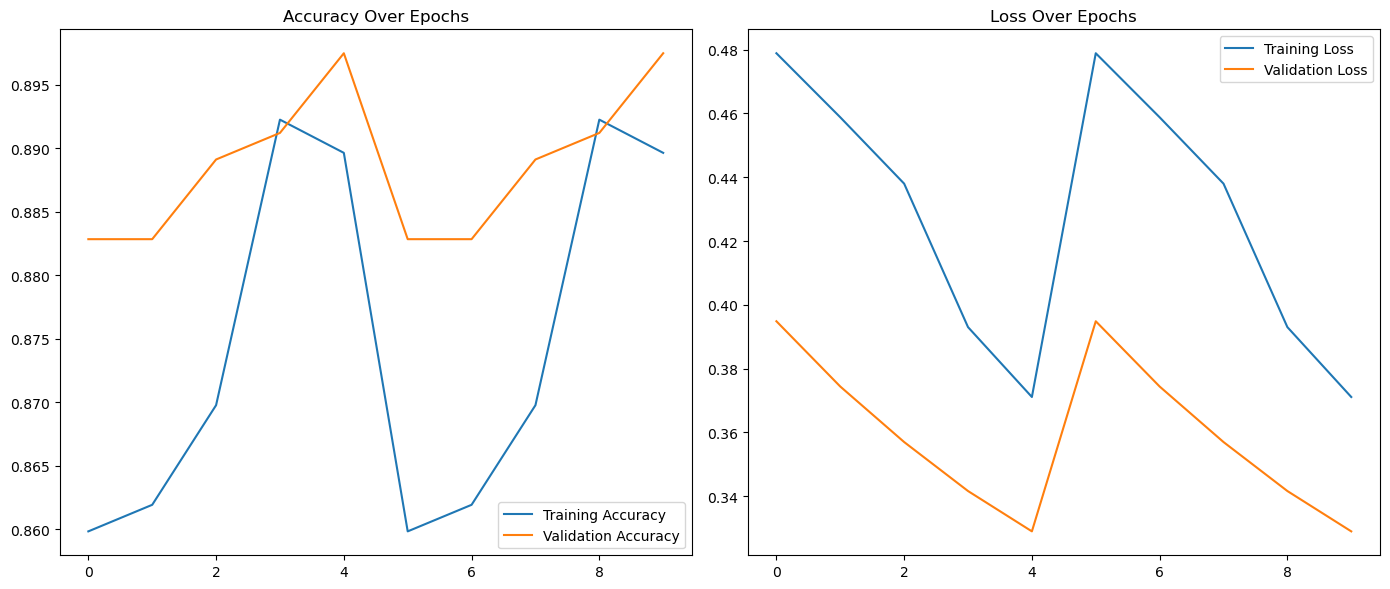

In [9]:
import matplotlib.pyplot as plt

# 1. دمج history الأساسي مع fine-tuning
acc = history_finetune.history['accuracy'] + history_finetune.history['accuracy']
val_acc = history_finetune.history['val_accuracy'] + history_finetune.history['val_accuracy']

loss = history_finetune.history['loss'] + history_finetune.history['loss']
val_loss = history_finetune.history['val_loss'] + history_finetune.history['val_loss']

epochs_range = range(len(acc))

# 2. رسم الإحصائيات
plt.figure(figsize=(14, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy Over Epochs')

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss Over Epochs')

plt.tight_layout()
plt.show()